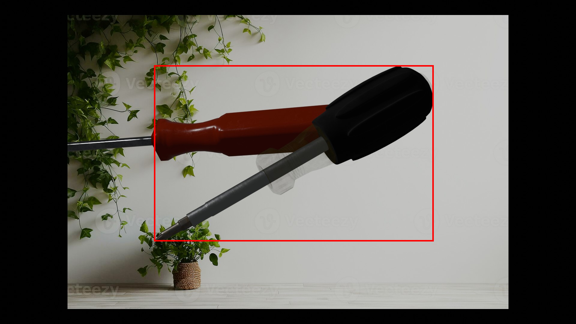

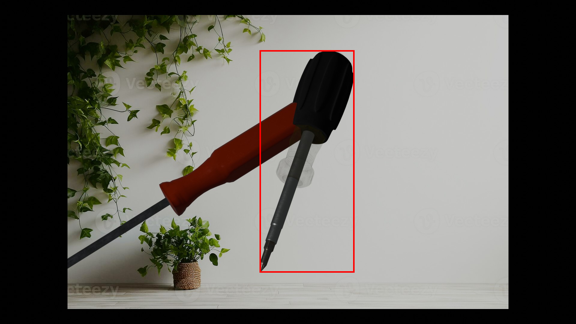

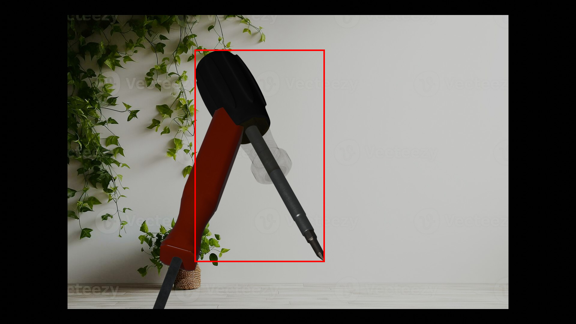

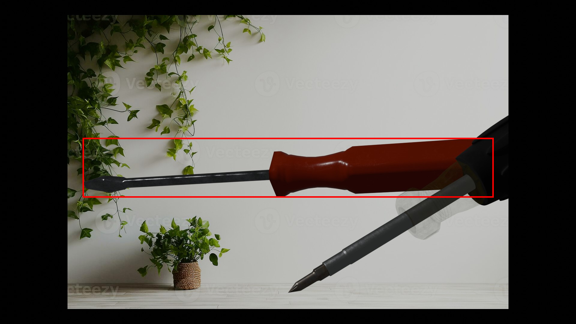

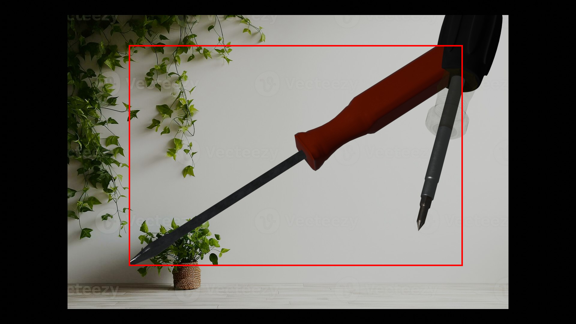

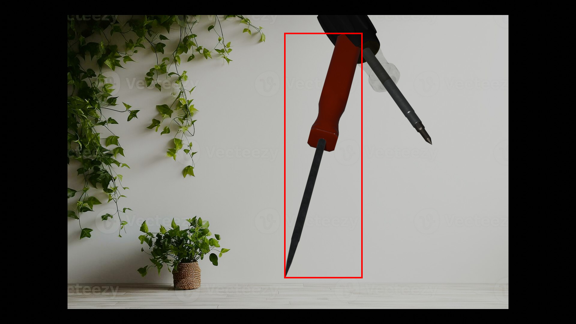

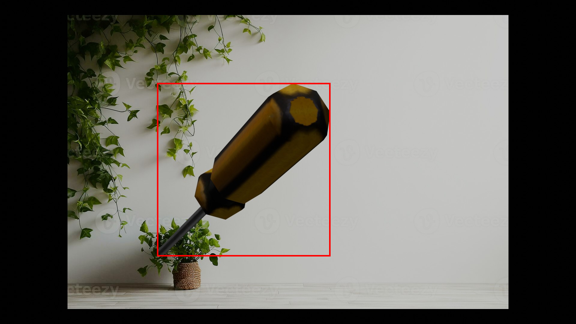

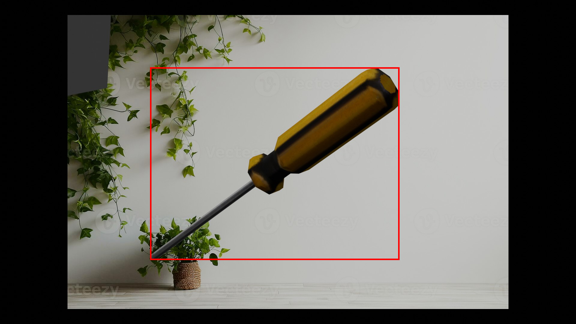

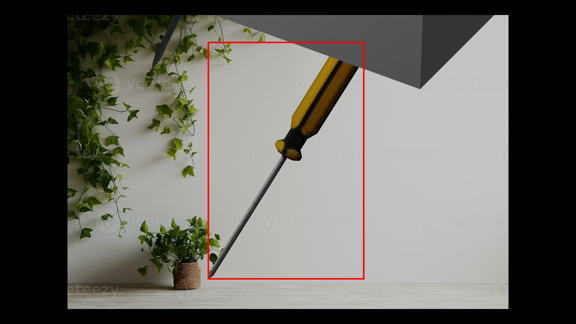

In [2]:
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
import shutil
from IPython.display import display

def show_bbox(image_path):
    # convert image path to label path
    label_path = image_path.replace('images', 'labels').replace('.jpg', '.txt')

    # Open the image and create ImageDraw object for drawing
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Split the line into five values
            label, x, y, w, h = line.split(' ')

            # Convert string into float
            x = float(x)
            y = float(y)
            w = float(w)
            h = float(h)

            # Convert center position, width, height into
            # top-left and bottom-right coordinates
            W, H = image.size
            x1 = (x - w/2) * W
            y1 = (y - h/2) * H
            x2 = (x + w/2) * W
            y2 = (y + h/2) * H

            # Draw the bounding box with red lines
            draw.rectangle((x1, y1, x2, y2),
                           outline=(255, 0, 0), # Red in RGB
                           width=5)             # Line width
    #image.show()

    display(image.resize((int(W * 0.3), int(H * 0.3))))

img_files = glob.glob(r"C:\Users\xlmq4\Documents\GitHub\3D_Data_Generation\data\screwdriver_new_new_new_new\images\*.jpg")

for img_file in img_files:
    # Show the bounding box for each image
    show_bbox(img_file)